Text classification with Naive Bayes

In [135]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
import seaborn as sns

#load dataset
mail = pd.read_csv('https://raw.githubusercontent.com/dapson2real/dawolayo/master/spam_filter.csv')
print(mail)

        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will �_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


In [136]:
#remove unnamed columns and rename selected columns
mail.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1,inplace=True)
mail.rename(columns = {'v1':'target','v2':'data'},inplace=True)

In [137]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
stop_words=set(stopwords.words('english'))
# Apply Stemming
stemmer = SnowballStemmer('english')
# Apply Lemmatization
wnl = WordNetLemmatizer()

def preprocessing(sentence):
    sentence = [wnl.lemmatize(w) for w in word_tokenize(sentence) if not w in string.punctuation]#Take out punctuations
    sentence = [stemmer.stem(w) for w in sentence if not w in stop_words] #Removing stop words and apply stemmer with NLTK
    #sentence = [wnl.lemmatize(w) for w in sentence if not w in stop_words] #Removing stop words and apply stemmer with NLTK
    sentence = filter(str.isalnum, sentence) #remove all non-alphanumeric characters
    return " ".join(sentence)

In [138]:
mail.data=mail.data.apply(preprocessing)
mail.data

0       go jurong point avail bugi n great world la e ...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkts 2...
3                     u dun say earli hor u c alreadi say
4                   nah i think go usf life around though
                              ...                        
5567    this 2nd time tri 2 contact u pound prize 2 cl...
5568                           will b go esplanad fr home
5569                              piti wa mood so suggest
5570    the guy bitch i act like interest buy someth e...
5571                                    rofl it true name
Name: data, Length: 5572, dtype: object

In [139]:
# Split dataset into train and test set
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(mail.data,mail.target,test_size=0.25,
                                                                    random_state=20, shuffle=True)
print('Total observations: %s\n' % len(mail.data))
print('Training observations: %s\n' % len(data_train))
print('Testing observations: %s\n' % len(data_test))
print(data_test)

Total observations: 5572

Training observations: 4179

Testing observations: 1393

4732    good morn dear shijutta have great amp success...
4952    i lost 4 pound sinc doc visit last week woot w...
3724                                    noth abt u whr ru
5261    i absolut love south park i recent start watch...
1274         let know contact i ve settl room let know ok
                              ...                        
4509                   this weekend fine excus much decor
3337                                        k u bore come
2912                 kind send one flat lt decim gt today
3071                                   ok lor but buy wat
3016    one joy lifei wake daywith thought somewhereso...
Name: data, Length: 1393, dtype: object


In [140]:
#%% Fitting Naive Bayes Classification to dataset

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.pipeline import Pipeline

vectorizer = TfidfVectorizer("english")
#nbreg = GaussianNB()
nbreg = MultinomialNB(alpha=0.1, class_prior=[0.4, 0.6], fit_prior=True)

model = Pipeline(steps=[('TfidfVectorizer',vectorizer),('regressor', nbreg)])
model.fit(data_train,target_train)
print(model)

Pipeline(memory=None,
         steps=[('TfidfVectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='english',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('regressor',
                 MultinomialNB(alpha=0.1, class_prior=[0.4, 0.6],
                               fit_prior=True))],
         verbos

,ham,spam
ham,1149,55
spam,9,180


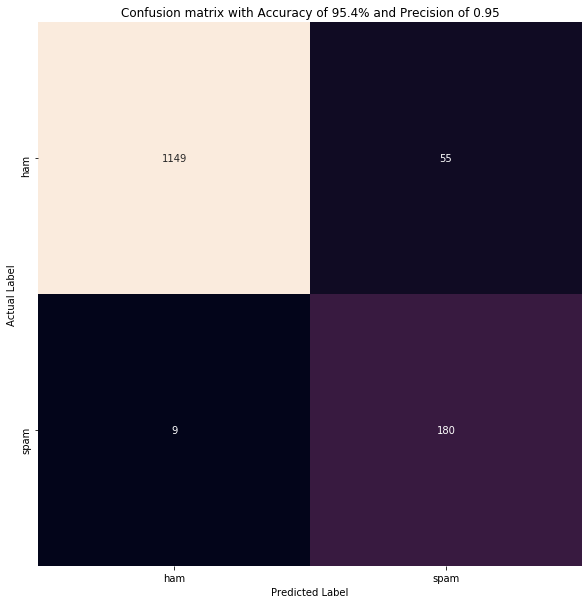

In [141]:
#test prediction
target_pred=model.predict(data_test)

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
model_acurracy=accuracy_score(target_test, target_pred)
labeler = LabelEncoder()
model_precision=f1_score(labeler.fit_transform(target_test), labeler.fit_transform(target_pred))
labels = list(mail.target.unique())
cm = confusion_matrix(target_test, target_pred)
cm = DataFrame(cm,index=labels,columns=labels)
plt.figure(figsize= (20,10))
sns.heatmap(cm, annot=True, fmt ='d', square=True, cbar=False, xticklabels=labels,yticklabels=labels)
plt.title('Confusion matrix with Accuracy of %.1f%% and Precision of %0.2f' % (model_acurracy * 100.0,model_acurracy))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

cm

In [142]:
#forward prediction

labels_pred=model.predict([preprocessing('Manchester City game with Arsenal will be replayed at the restart of the Permier league after Covid-19')])
print(labels_pred[0])

spam


In [143]:
#forward prediction
preprocessing('Manchester City game with Arsenal will be replayed at the restart of the Permier league after Covid-19')

'manchest citi game arsenal replay restart permier leagu'